In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [ ]:
with tf.device('/CPU:0'):
    model = tf.keras.models.load_model('traine_model.keras')


In [4]:
model= tf.keras.models.load_model('traine_model.keras')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                    

## visualising single imahe of test set

In [62]:
!pip install opencv-python

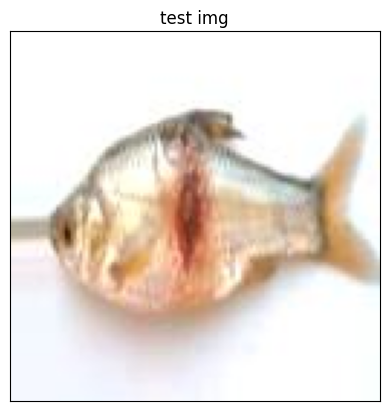

In [63]:
import cv2
image_path="Test/Bacterial Red disease/Bacterial Red disease (51).jpg"
#reading image
img= cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#displaying image
plt.imshow(img)
plt.title("test img")
plt.xticks([])
plt.yticks([])
plt.show()

## TESTING MODEL

In [64]:
image= tf.keras.preprocessing.image.load_img(image_path,target_size=(64, 64))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr]) #convert single image to a batch
print(input_arr.shape)

(1, 64, 64, 3)


In [66]:
with tf.device('/CPU:0'):
    prediction = model.predict(input_arr)
prediction,prediction.shape
    


1/1 [==============================] - 0s 96ms/step


(array([[0.16932487, 0.35951173, 0.08420449, 0.00878257, 0.03293286,
         0.13390926, 0.21133414]], dtype=float32),
 (1, 7))

In [35]:
prediction= model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 20ms/step


(array([[0.14784819, 0.14337476, 0.13139248, 0.14318474, 0.1327689 ,
         0.16029096, 0.14114   ]], dtype=float32),
 (1, 7))

In [67]:
result_index= np.argmax(prediction)
result_index

1

In [68]:
class_name= ['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']

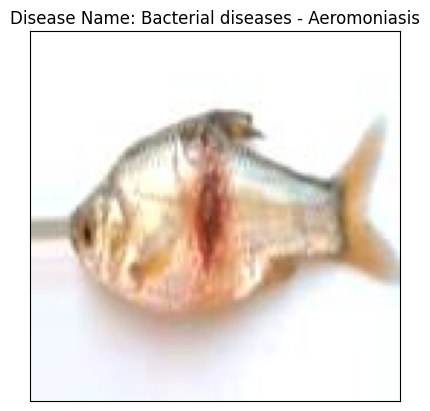

In [69]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [70]:
model_prediction

'Bacterial diseases - Aeromoniasis'